In [1]:
import time
start_time=time.time()


In [2]:
from pathlib import Path

from astropy.table import Table
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
sns.set_color_codes()
from scipy import interpolate
import json

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="17"

Input path

observations folder location

In [3]:
text_file_0 = open("path-observations.txt", "r")
path_obs = text_file_0.read()

In [4]:
datapath_obs = Path(path_obs).expanduser()

results folder location

In [5]:
text_file_1 = open("path-results.txt", "r")
path_res = text_file_1.read()

In [6]:
datapath_res= Path(path_res).expanduser()

files names

In [7]:
data_file = 'FLA-M8'

In [8]:
name_export='FLA-M8-H'

Input data of the region

In [9]:
dist = 1250 #parsecs
seeing = 0.9 #seeing arcsec FWHM

In [10]:
pc = dist*(2*np.pi) / (360 * 60 * 60)
s0 = (seeing*pc)/2.355 #seeing pc RMS

pc,s0

(0.0060601710138692, 0.002315988922497783)

In [11]:
damiani_tab1_file = str(datapath_obs) + '\\' +data_file + ".fits"
tab = Table.read(damiani_tab1_file)
tab
df = tab.to_pandas()
df.describe()

,RAdeg,DEdeg,RVHalpha,sigHalpha,NormHalpha,RV[NII]6584,sig[NII]6584,Norm[NII]6584,RV[SII]6717,sig[SII]6717,Norm[SII]6717,RV[SII]6731,sig[SII]6731,Norm[SII]6731
count,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000
mean,271.110700,-24.332642,-6.258445,13.711606,56980.737850,-3.934894,11.655811,10499.992090,-3.204393,11.567137,2044.263891,-2.989252,11.512982,1639.080833
std,0.164268,0.105422,2.742485,1.677870,56029.717118,3.240030,1.140301,10622.170782,3.345863,1.205795,1687.371379,3.328345,1.229661,1718.881796
min,270.544500,-24.566860,-13.550000,11.890000,1612.260000,-11.440000,3.990000,651.350000,-12.450000,3.590000,217.730000,-12.480000,8.960000,163.940000
25%,271.010500,-24.406500,-8.460000,13.160000,24079.470000,-5.950000,10.870000,5686.930000,-5.440000,10.730000,1197.130000,-5.260000,10.620000,889.610000
50%,271.110600,-24.344670,-6.370000,13.550000,41640.680000,-3.950000,11.530000,8211.000000,-3.190000,11.450000,1622.020000,-2.980000,11.380000,1223.920000
75%,271.211600,-24.256500,-4.450000,14.030000,69764.840000,-1.900000,12.310000,11584.220000,-1.180000,12.250000,2273.270000,-0.960000,12.230000,1750.890000
max,271.606600,-24.054330,2.840000,64.590000,589418.530000,8.010000,18.520000,125752.930000,10.100000,17.240000,17676.600000,10.120000,17.550000,20417.110000


In [12]:
m=df['sigHalpha'] < df['sigHalpha'].mean()+4*df['sigHalpha'].std()

In [13]:
df=df[m]

<ipython-input-14-15740d443dac>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.pairplot(df[m],


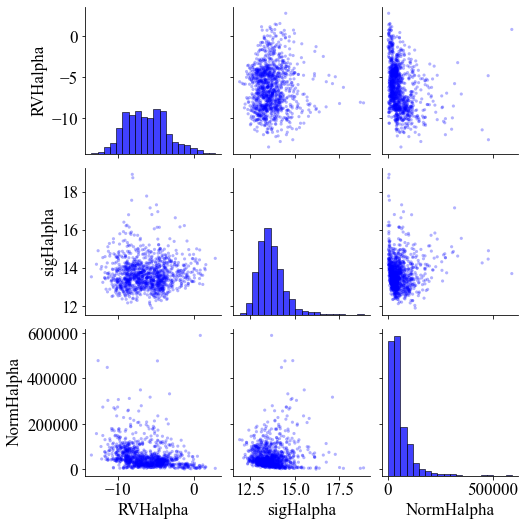

In [14]:
sns.pairplot(df[m],
             vars=["RVHalpha", "sigHalpha", "NormHalpha"],
             diag_kind='hist',
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none', color="blue"),
             diag_kws=dict(bins=20, color="blue"),
            )

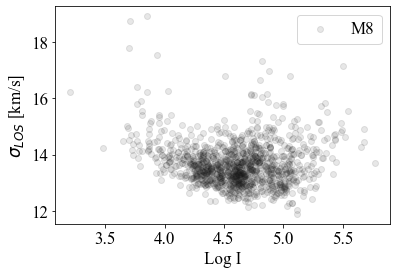

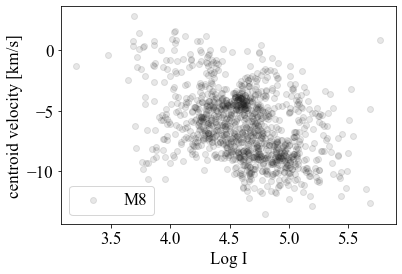

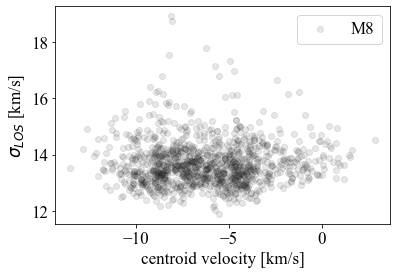

In [15]:
fig, ax = plt.subplots()
plt.scatter(np.log10(df.NormHalpha),df.sigHalpha, alpha=0.1, color='k', label='M8')

ax.set_xlabel('Log I')
ax.set_ylabel('$σ_{LOS}$ [km/s]')
plt.legend()

fig, ax = plt.subplots()
plt.scatter(np.log10(df.NormHalpha),df.RVHalpha, alpha=0.1, color='k', label='M8')

ax.set_xlabel('Log I')
ax.set_ylabel('centroid velocity [km/s]')
plt.legend()

fig, ax = plt.subplots()
plt.scatter(df.RVHalpha,df.sigHalpha, alpha=0.1, color='k', label='M8')

ax.set_ylabel('$σ_{LOS}$ [km/s]')
ax.set_xlabel('centroid velocity [km/s]')
plt.legend()

plt.rcParams["font.size"]="17"

In [16]:
df.describe()

,RAdeg,DEdeg,RVHalpha,sigHalpha,NormHalpha,RV[NII]6584,sig[NII]6584,Norm[NII]6584,RV[SII]6717,sig[SII]6717,Norm[SII]6717,RV[SII]6731,sig[SII]6731,Norm[SII]6731
count,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000
mean,271.110701,-24.332602,-6.257440,13.668342,56579.890731,-3.929209,11.662330,10508.154413,-3.199966,11.565697,2044.058087,-2.985740,11.510332,1638.544439
std,0.164338,0.105458,2.743435,0.782749,54338.950357,3.235531,1.118632,10622.996539,3.343837,1.205296,1688.074478,3.327578,1.226816,1719.514527
min,270.544500,-24.566860,-13.550000,11.890000,1612.260000,-11.440000,8.600000,651.350000,-12.450000,3.590000,217.730000,-12.480000,8.960000,163.940000
25%,271.010475,-24.406590,-8.462500,13.160000,24060.892500,-5.942500,10.870000,5690.635000,-5.432500,10.727500,1197.040000,-5.252500,10.620000,888.072500
50%,271.110750,-24.344500,-6.365000,13.545000,41627.050000,-3.945000,11.530000,8217.420000,-3.185000,11.445000,1621.685000,-2.980000,11.375000,1222.295000
75%,271.211650,-24.256500,-4.450000,14.030000,69520.437500,-1.900000,12.310000,11584.360000,-1.177500,12.250000,2272.107500,-0.957500,12.222500,1747.320000
max,271.606600,-24.054330,2.840000,18.910000,589418.530000,8.010000,18.520000,125752.930000,10.100000,17.240000,17676.600000,10.120000,17.550000,20417.110000


In [17]:
df2 = df[['RAdeg', 'DEdeg', 'RVHalpha','NormHalpha','sigHalpha']].copy()
df2.rename(columns = {'RAdeg' : 'X', 'DEdeg' : 'Y', 'RVHalpha' : 'RV','NormHalpha':'I','sigHalpha':'Sig',}, inplace = True)
df2.describe()

,X,Y,RV,I,Sig
count,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000
mean,271.110701,-24.332602,-6.257440,56579.890731,13.668342
std,0.164338,0.105458,2.743435,54338.950357,0.782749
min,270.544500,-24.566860,-13.550000,1612.260000,11.890000
25%,271.010475,-24.406590,-8.462500,24060.892500,13.160000
50%,271.110750,-24.344500,-6.365000,41627.050000,13.545000
75%,271.211650,-24.256500,-4.450000,69520.437500,14.030000
max,271.606600,-24.054330,2.840000,589418.530000,18.910000


In [18]:
data=df2

Text(0.5, 14.360000000000014, 'Radial velocity [km/s]')

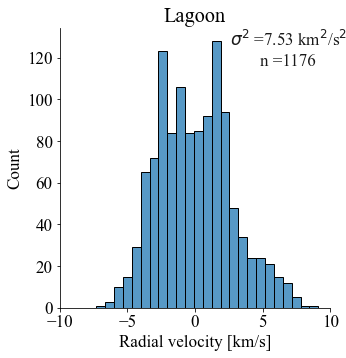

In [19]:
#fig, ax = plt.subplots()

sns.displot(data.RV-data.RV.mean(),bins=25)
plt.xlim(-10,10)


plt.text(0.7, 1.2,'n ='+str(data.RV.count()), ha='center', va='center', transform=ax.transAxes, color='k')
#plt.text(0.35, 0.78,'$μ$ ='+str(np.round(data.RV.mean(),2))+' km/s', ha='center', va='center', transform=ax.transAxes, color='k')
plt.text(0.7, 1.3,'$σ^{2}$ ='+str(np.round(data.RV.var(),2))+' km$^{2}$/s$^{2}$', ha='center', va='center', transform=ax.transAxes, color='k')

plt.title('Lagoon')

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="15"

plt.xlabel('Radial velocity [km/s]')

In [20]:
types = ['HD 164536', '7 Sgr', 'Herschel 36', '9 Sgr', 'HD 164816', 'HD 164865', 'M8E-IR', 'HD 165052','HD 165246']
x_coords = [270.6609, 270.7129, 270.9180, 270.9685, 270.9869, 271.0634, 271.2244, 271.2940,271.5195]
y_coords = [-24.2554, -24.2825, -24.3785, -24.3607, -24.3126, -24.1834, -24.4448, -24.3986,-24.1955]

In [21]:
points_of_interest = {
    "HD 164536": [270.6609, -24.2554],
    "7 Sgr": [270.7129, -24.2825],
    "Herschel 36": [270.9180, -24.3785],
    "9 Sgr": [270.9685, -24.3607],
    "HD 164816": [270.9869, -24.3126],
    "HD 164865": [271.0634, -24.1834],
    "M8E-IR": [271.2244, -24.4448],
    "HD 165052": [271.2940, -24.3986],
    "HD 165246": [271.5195, -24.1955],
}
def mark_points(ax):
    for label, c in points_of_interest.items():
        ax.plot(c[0], c[1], marker='+', markersize='12', color='k')

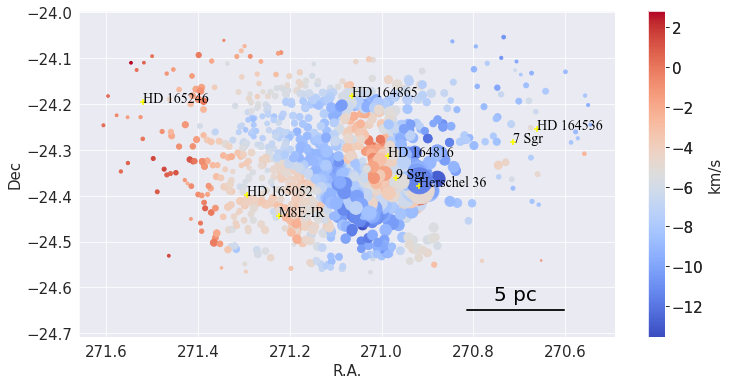

In [22]:
with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots(figsize=(12, 6))
    scat = ax.scatter(df.RAdeg, df.DEdeg, 
                      s=0.0015*((df.NormHalpha)), 
                      c=df.RVHalpha,cmap='coolwarm' 
                     )
    fig.colorbar(scat, ax=[ax])
    #mark_points(ax)
    #ax.set_facecolor('k')
    #ax.axis('equal')
    ax.set_aspect('equal', 'datalim')
    fig.colorbar(scat, ax=ax).set_label("km/s")

    ax.invert_xaxis()

    ax.text(0.855, 0.1, '5 pc',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=20)
    
    plt.axhline(y=-24.65, xmin=0.725, xmax=0.905, linewidth=2, color = 'k')

    ax.set(xlabel='R.A.', ylabel='Dec')

    
for i,type in enumerate(types):
    x = x_coords[i]
    y = y_coords[i]
    plt.scatter(x, y, marker='+', color='yellow')
    plt.text(x, y, type, fontsize=14)

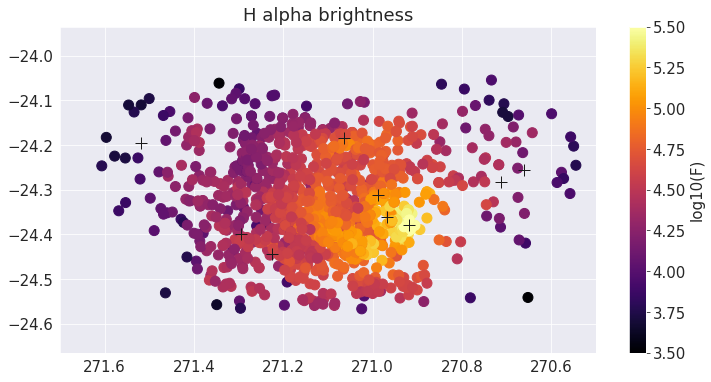

In [23]:
with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots(figsize=(12, 6))
    scat = ax.scatter(df.RAdeg, df.DEdeg, s=100, c=np.log10(df.NormHalpha), cmap='inferno', vmin=3.5, vmax=5.5)
    fig.colorbar(scat, ax=ax).set_label("log10(F)")
    mark_points(ax)
    ax.set_title('H alpha brightness')
    ax.axis('equal')
    ax.axis([270.5, 271.7, -24.6, -24])
    ax.invert_xaxis()

In [24]:
data_export_list = {
        'name': name_export, 
        'pc' : pc,
        's0' : s0,
 #       'pix' : pix,
         name_export : np.array(data[m]),
      }
data_export_list

<ipython-input-24-4a841e28805e>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  name_export : np.array(data[m]),


{'name': 'FLA-M8-H',
 'pc': 0.0060601710138692,
 's0': 0.002315988922497783,
 'FLA-M8-H': array([[ 2.7105620e+02, -2.4107690e+01, -4.4400000e+00,  1.3604470e+04,
          1.3330000e+01],
        [ 2.7103480e+02, -2.4185440e+01, -8.6700000e+00,  7.1283370e+04,
          1.3350000e+01],
        [ 2.7104330e+02, -2.4221190e+01, -2.4100000e+00,  4.4833480e+04,
          1.3350000e+01],
        ...,
        [ 2.7097470e+02, -2.4308190e+01, -5.0800000e+00,  1.0049509e+05,
          1.2890000e+01],
        [ 2.7094820e+02, -2.4310250e+01, -8.8300000e+00,  9.8151600e+04,
          1.3590000e+01],
        [ 2.7095180e+02, -2.4327810e+01, -7.1700000e+00,  1.0838373e+05,
          1.3340000e+01]])}

In [25]:
class MyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return super(MyEncoder, self).default(obj)

In [26]:
jsonfilename =name_export +"-l.json"
with open(datapath_res/jsonfilename, "w") as f:
    json.dump(data_export_list, fp=f, indent=3, cls=MyEncoder)

In [27]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 7.92847466468811 seconds ---


In [28]:
!jupyter nbconvert --to script --no-prompt otv-FLA-M8-H.ipynb

[NbConvertApp] Converting notebook otv-FLA-M8-H.ipynb to script
[NbConvertApp] Writing 5791 bytes to otv-FLA-M8-H.py
